The objective of this task is to try different clustering techniques for segmenting the customers data.

**importing the Libraries**

In [1]:
# for basic mathematics operation 
import numpy as np
import pandas as pd
from pandas import plotting

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

# for path
import os
print(os.listdir('../'))


**Dataset Description**

This data contains the basic information (ID, age, gender, income, spending score) about the customers

1 - ID: Uniqe identifier

2 - age (numeric)

3 - gender

4 - income

5 - spending score







**Reading the Dataset**

In [21]:
# importing the dataset
data = pd.read_csv('Mall_Customers.csv')

data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [22]:
# check the shape of the data
data.shape

(200, 5)

In [23]:
# checking if there is any NULL data

data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Data Visualization

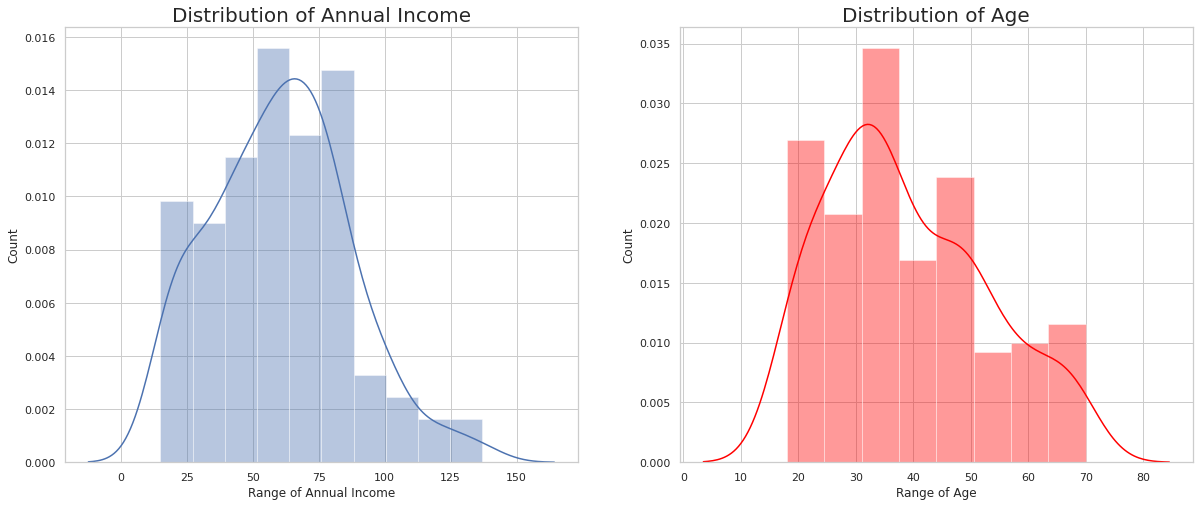

In [25]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(data['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(data['Age'], color = 'red')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

> Here, In the above Plots we can see the Distribution pattern of Age, By looking at the plots, 

>> we can infer one thing that There are few people who earn more than 100 US Dollars.
>> Most of the people have an earning of around 50-75 US Dollars.
>> Also, we can say that the least Income is around 20 US Dollars.

> Taking inferences about the Customers.
>> The most regular customers for the Mall has age around 30-35 years of age.
>> Whereas the the senior citizens age group is the least frequent visitor in the Mall.
>> Youngsters are lesser in umber as compared to the Middle aged people.


In [27]:
data.Age.skew(), data['Annual Income (k$)'].skew()

(0.48556885096681657, 0.3218425498619055)

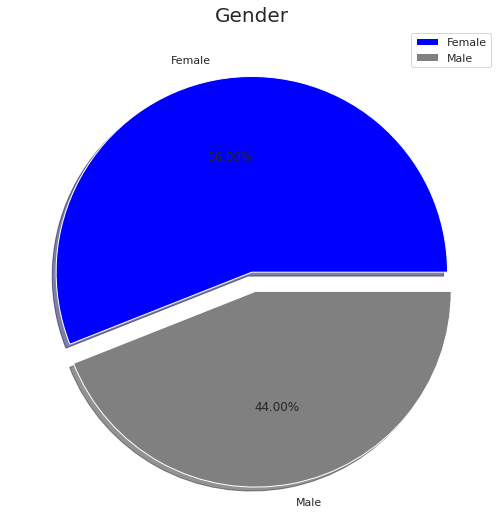

In [29]:
labels = ['Female', 'Male']
size = data['Gender'].value_counts()
colors = ['blue', 'gray']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

> By looking at the above pie chart which explains about the distribution of Gender in the Mall
>> Interestingly, The Females are in the lead with a share of 56% whereas the Males have a share of 44%, that's a huge gap specially when the population of Males is comparatively higher than Females.

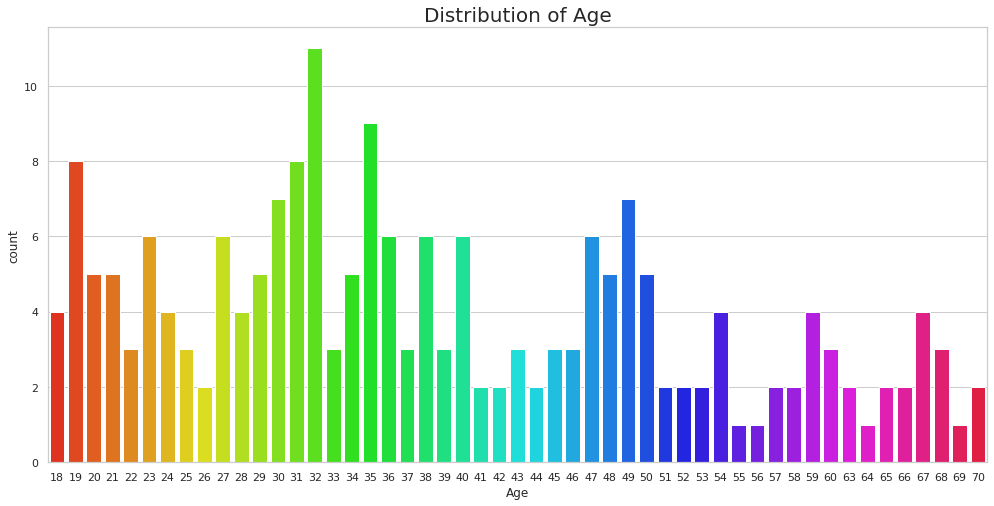

In [30]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(data['Age'], palette = 'hsv')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

> This Graph shows a more Interactive Chart about the distribution of each Age Group in the Mall for more clariy about the Visitor's Age Group in the Mall.
>> By looking at the above graph-, It can be seen that the Ages from 27 to 39 are very much frequent but there is no clear pattern, we can only find some group wise patterns such as the the older age groups are lesser frequent in comparison.
>> Interesting Fact, There are equal no. of Visitors in the Mall for the Agee 18 and 67.
>> People of Age 55, 56, 69, 64 are very less frequent in the Malls.
>> People at Age 32 are the Most Frequent Visitors in the Mall.

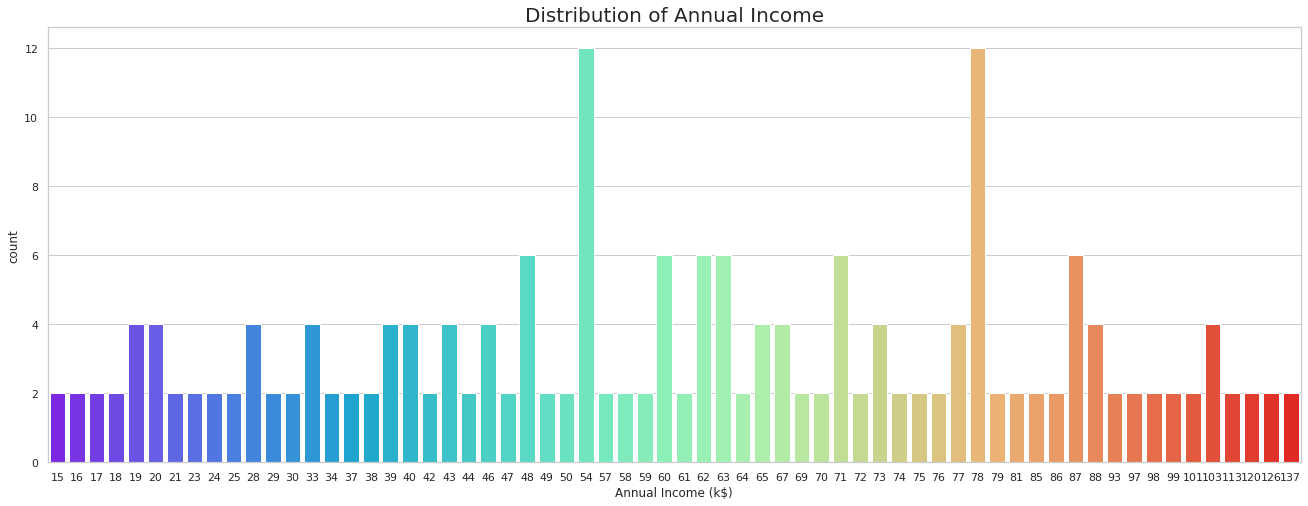

In [31]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(data['Annual Income (k$)'], palette = 'rainbow')
plt.title('Distribution of Annual Income', fontsize = 20)
plt.show()

> Again, This is also a chart to better explain the Distribution of Each Income level, Interesting there are customers in the mall with a very much comparable freqyuency with their Annual Income ranging from 15 US Dollars to 137K US Dollars.
> There are more Customers in the Mall whoc have their Annual Income as 54k US Dollars or 78 US Dollars.

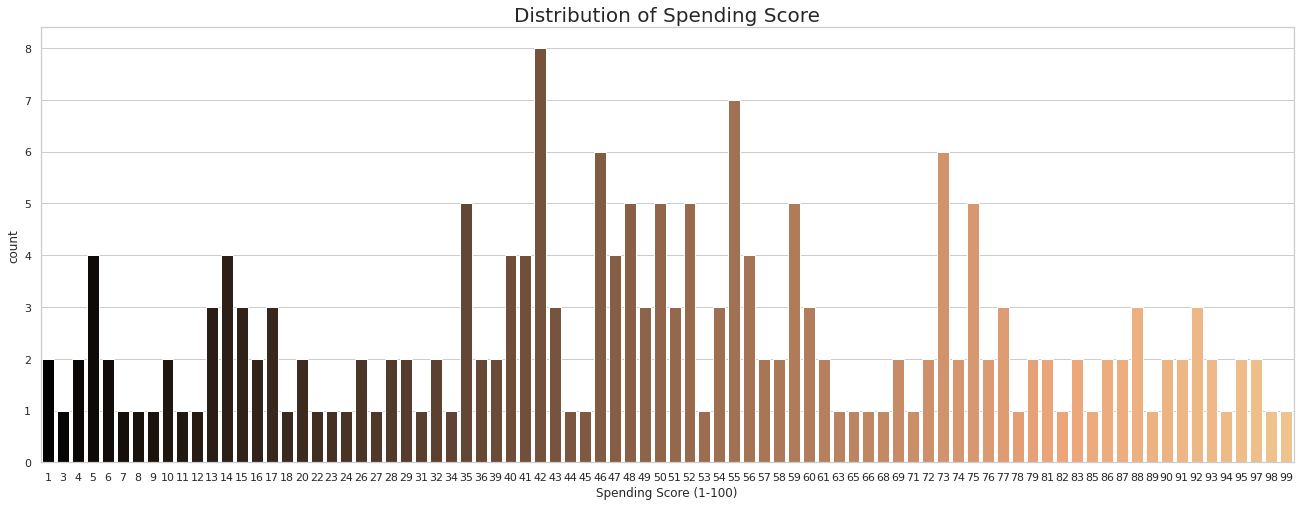

In [32]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(data['Spending Score (1-100)'], palette = 'copper')
plt.title('Distribution of Spending Score', fontsize = 20)
plt.show()

> This is the Most Important Chart in the perspective of Mall, as It is very Important to have some intuition and idea about the Spending Score of the Customers Visiting the Mall.
>> On a general level, we may conclude that most of the Customers have their Spending Score in the range of 35-60.
>> Interesting there are customers having I spending score also, and 99 Spending score also, Which shows that the mall caters to the variety of Customers with Varying needs and requirements available in the Mall.

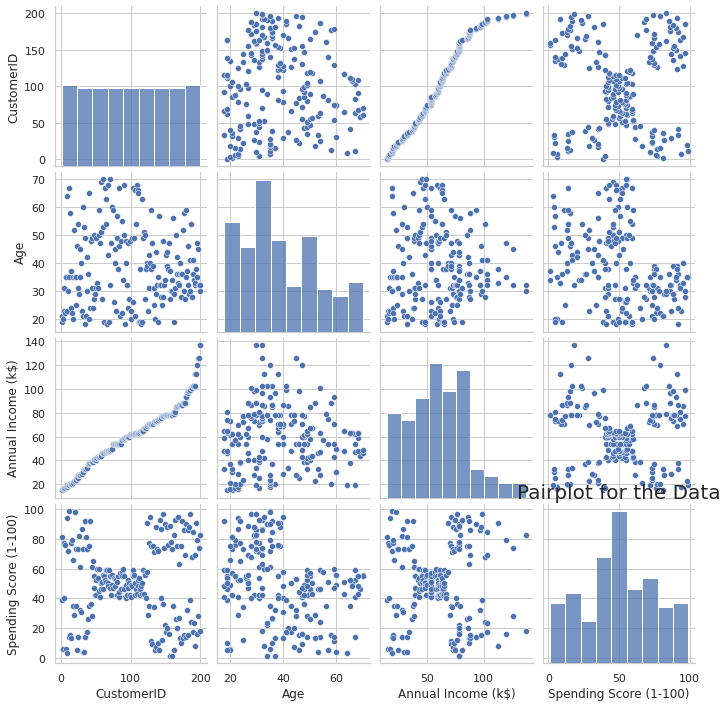

In [33]:
sns.pairplot(data)
plt.title('Pairplot for the Data', fontsize = 20)
plt.show()

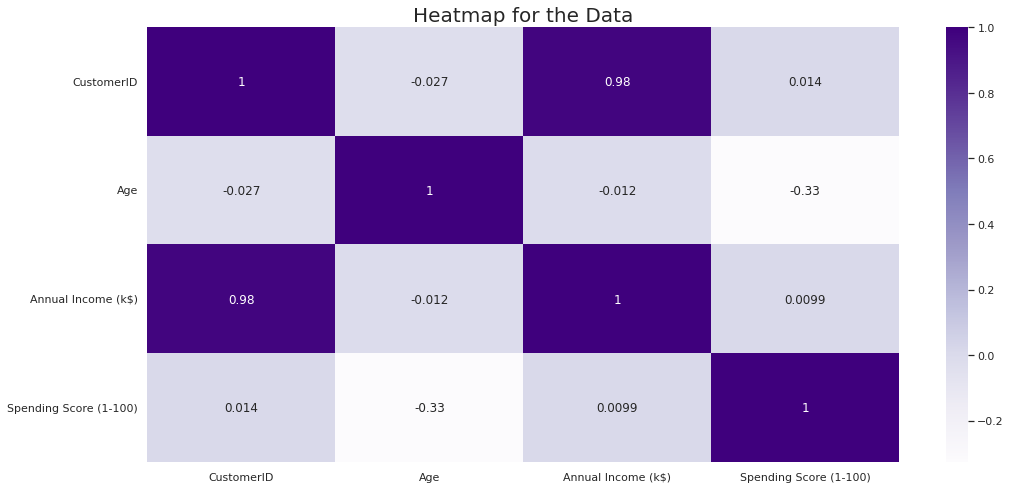

In [36]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(data.corr(), cmap = 'Purples', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

> The Above Graph for Showing the correlation between the different attributes of the Mall Customer Segementation Dataset, This Heat map reflects the most correlated features with Orange Color and least correlated features with yellow color.
>> We can clearly see that these attributes do not have good correlation among them, that's why we will proceed with all of the features.

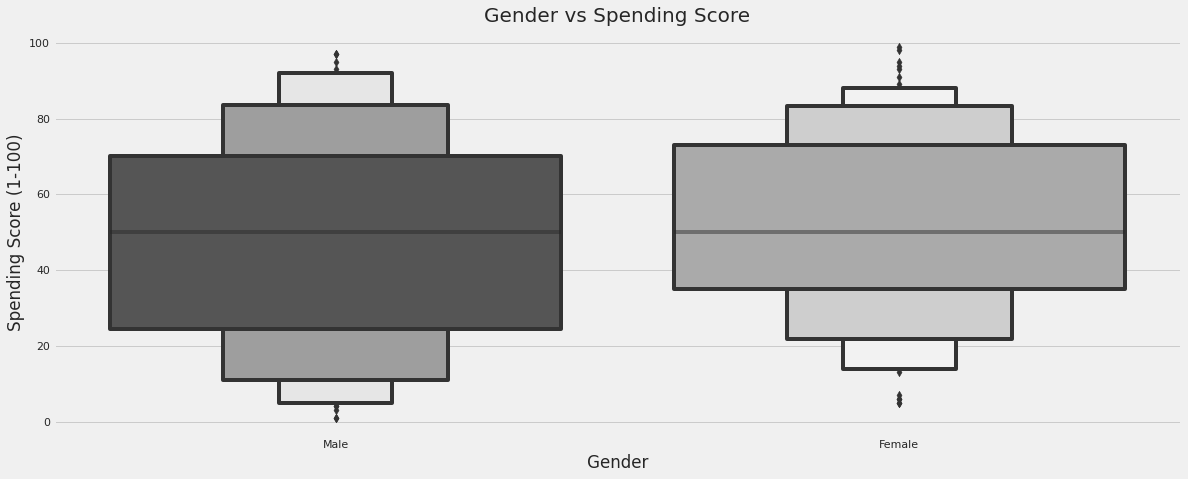

In [57]:
#  Gender vs Spendscore

plt.rcParams['figure.figsize'] = (18, 7)
sns.boxenplot(data['Gender'], data['Spending Score (1-100)'], palette = 'gray')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

> Bi-variate Analysis between Gender and Spending Score, 
>> It is clearly visible that the most of the males have a Spending Score of around 25k US Dollars to 70k US Dollars whereas the Females have a spending score of around 35k US Dollars to 75k US Dollars. which again points to the fact that women are Shopping Leaders.

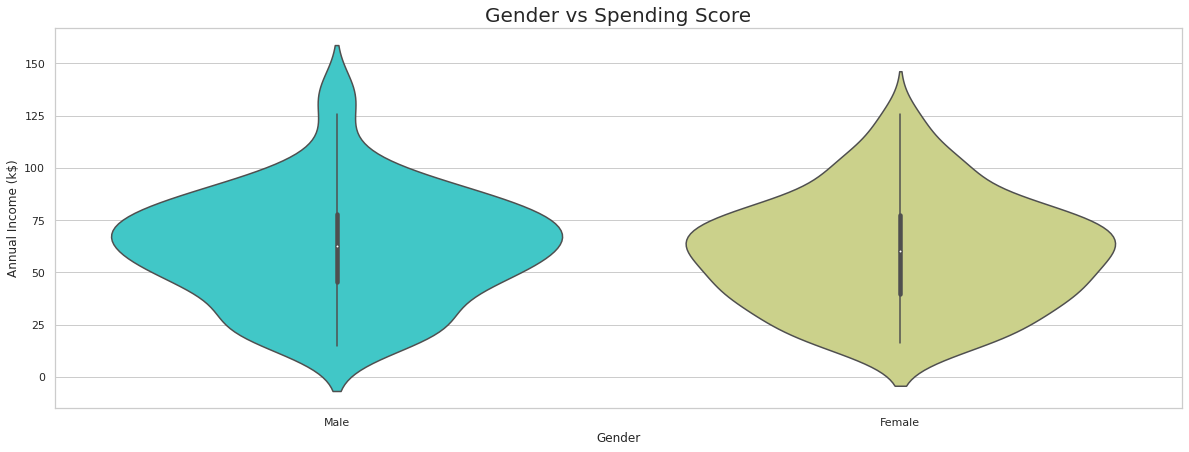

In [38]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.violinplot(data['Gender'], data['Annual Income (k$)'], palette = 'rainbow')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

> Again a Bivariate Analysis between the Gender and the Annual Income, to better visualize the Income of the different Genders.
>> There are more number of males who get paid more than females. But, The number of males and females are equal in number when it comes to low annual income. 

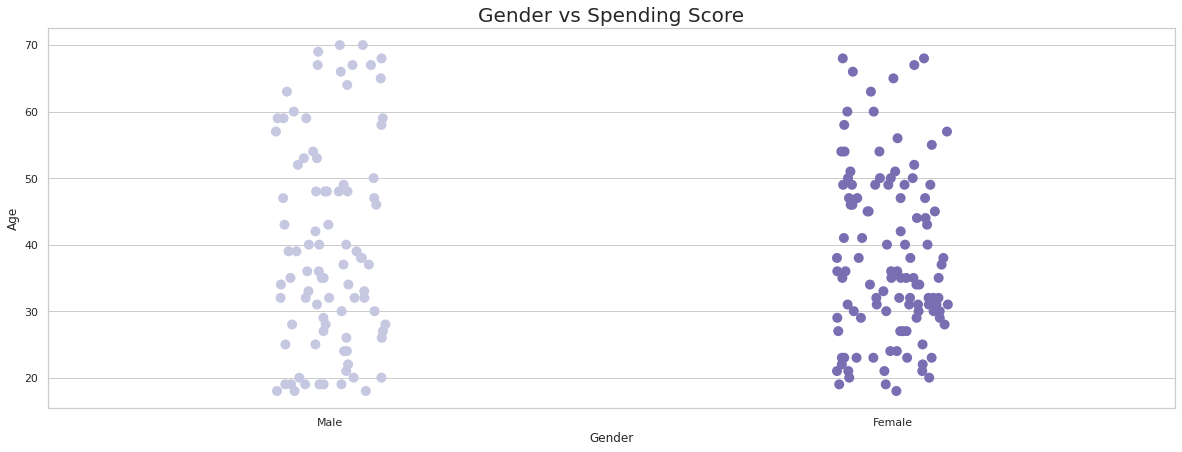

In [39]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.stripplot(data['Gender'], data['Age'], palette = 'Purples', size = 10)
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

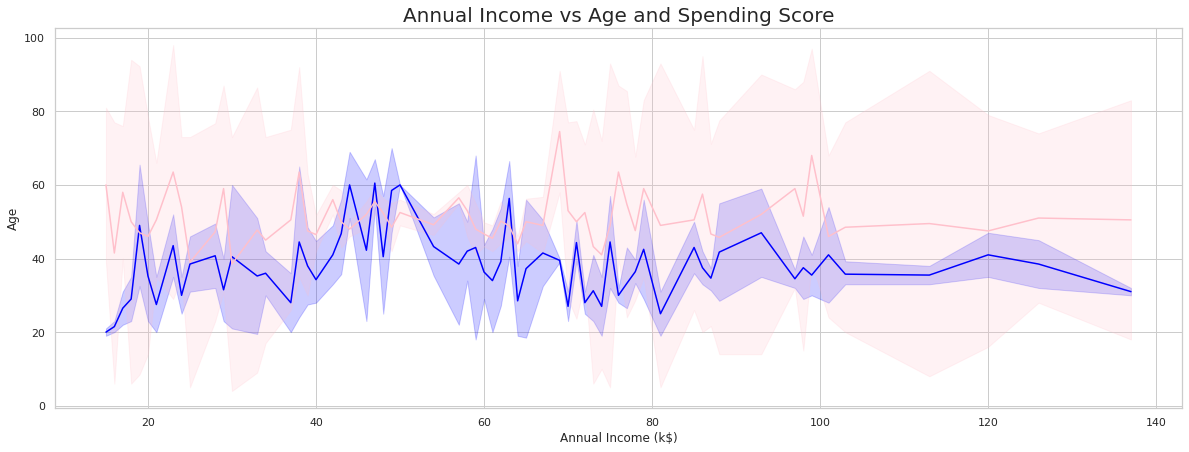

In [40]:

x = data['Annual Income (k$)']
y = data['Age']
z = data['Spending Score (1-100)']

sns.lineplot(x, y, color = 'blue')
sns.lineplot(x, z, color = 'pink')
plt.title('Annual Income vs Age and Spending Score', fontsize = 20)
plt.show()

> The above Plot Between Annual Income and Age represented by a blue color line, and a plot between Annual Income and the Spending Score represented by a pink color. shows how Age and Spending Varies with Annual Income.

## Clustering Analysis

In [41]:
x = data.iloc[:, [3, 4]].values

# let's check the shape of x
print(x.shape)

(200, 2)


## 1. Kmeans Algorithm

**The Elbow Method to find the No. of Optimal Clusters**

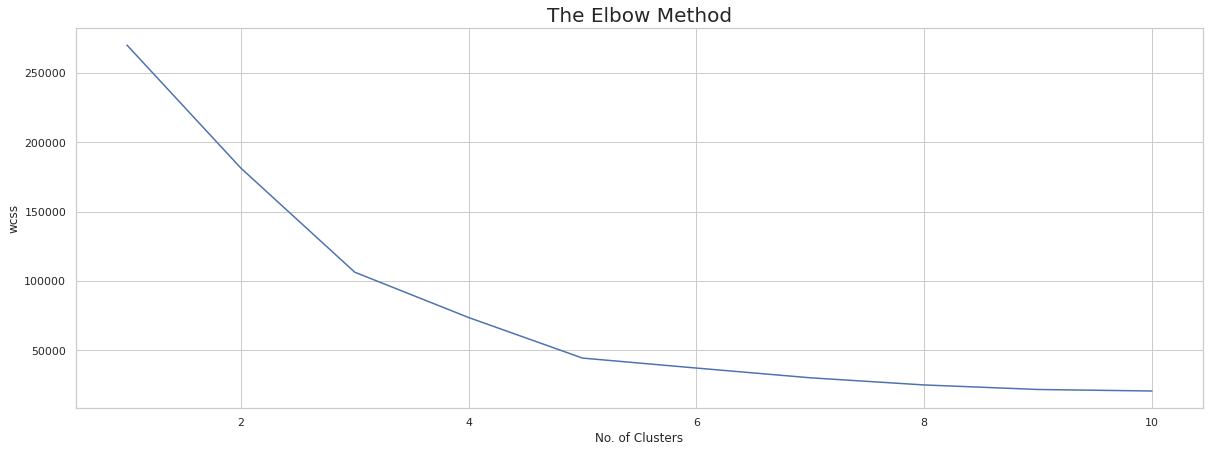

In [42]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

**Visualizaing the Clusters**

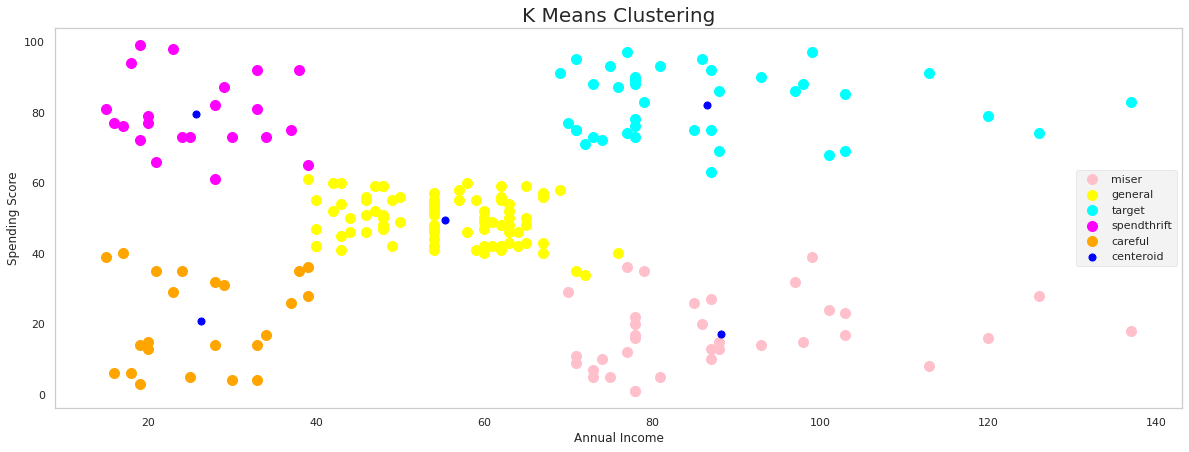

In [43]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

> This Clustering Analysis gives us a very clear insight about the different segments of the customers in the Mall. There are clearly Five segments of Customers namely Miser, General, Target, Spendthrift,  Careful based on their Annual Income and Spending Score which are reportedly the best factors/attributes to determine the segments of a customer in a Mall.

## 2. Hierarchial Clustering

>Hierarchical clustering, also known as hierarchical cluster analysis, is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other

**Using Dendrograms to find the no. of Optimal Clusters**

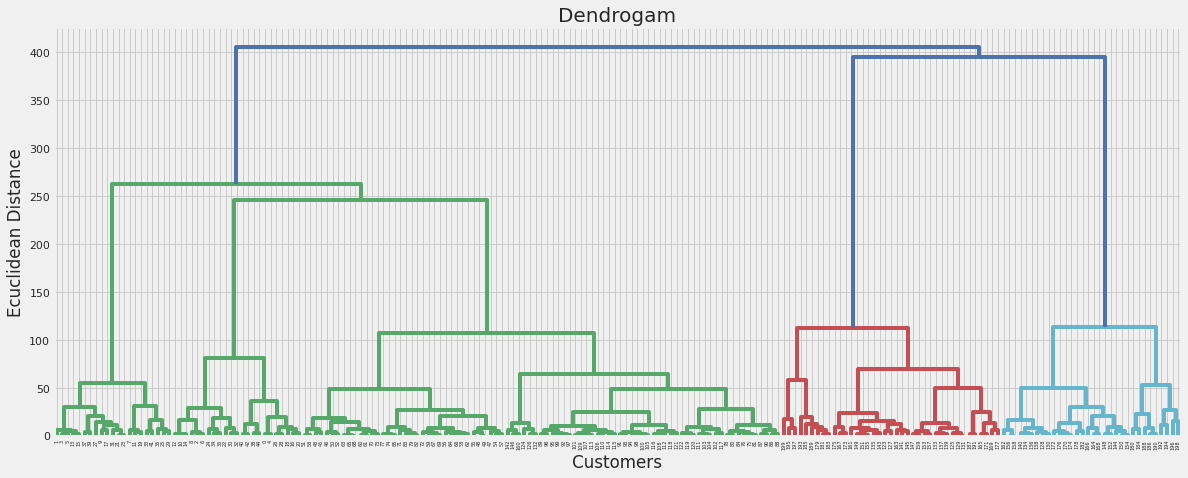

In [44]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

**Visualizing the Clusters of Hierarchial Clustering**

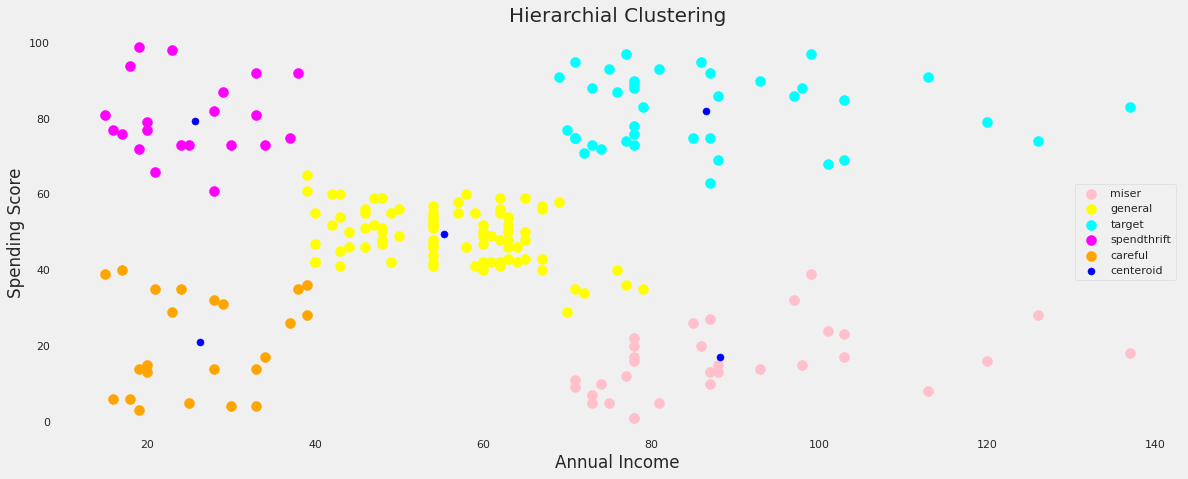

In [45]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('Hierarchial Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

## 3. Mean Shift Clustering

number of estimated clusters : 3


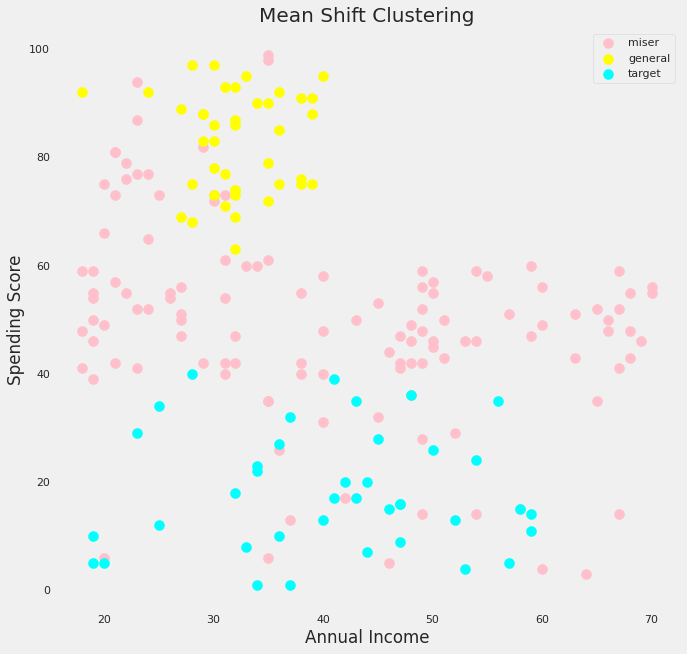

In [54]:

from sklearn.cluster import MeanShift, estimate_bandwidth



# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(x, quantile=0.2, n_samples=100)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
y_ms = ms.fit_predict(x)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)
plt.scatter(x[y_ms == 0, 0], x[y_ms == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x[y_ms == 1, 0], x[y_ms == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_ms == 2, 0], x[y_ms == 2, 1], s = 100, c = 'cyan', label = 'target')


plt.style.use('fivethirtyeight')
plt.title('Mean Shift Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

**Clusters of Customers **

In [49]:
x = data[['Age', 'Spending Score (1-100)', 'Annual Income (k$)']].values
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
km.fit(x)
labels = km.labels_
centroids = km.cluster_centers_


In [56]:

data['labels'] =  labels
trace1 = go.Scatter3d(
    x= data['Age'],
    y= data['Spending Score (1-100)'],
    z= data['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = data['labels'], 
        size= 10,
        line=dict(
            color= data['labels'],
            width= 12
        ),
        opacity=0.8
     )
)
df = [trace1]

layout = go.Layout(
    title = 'Character vs Gender vs Alive or not',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)

fig = go.Figure(data = df, layout = layout)
py.iplot(fig)







## Summary Key Findings and Insights

In this analysis task, i have used 3 tehniques for segmenting the customers data. The techinques are Kmeans, Hierarchial Clustering, and Mean Shift. Kmeans and Hierarchial has produced similar results with 5 segments. I have chosed Kmeans as final model as it is simple and has shown that there is less overlap between classes.

## Suggestions for next steps

More features can be added from customer database to impove the clusttering task. We can can try some other techniques for clustering such as DBScan. In addition, some hyperparamters tuning can be performed to improve the clustering task.

